## Regressão Linear

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import probplot, norm
import matplotlib.pyplot as plt

C:\Users\vitor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def regre(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    result = model.fit()
    return result

In [3]:
dados = pd.read_csv('featuresdf1.csv')

In [4]:
dados.head()

,Unnamed: 0,id,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.000000,0.1120,0.846,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019
4,4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,0.0367,0.0552,0.000000,0.1670,0.811,80.924


## Analise das variáveis

Primeira variavel a ser analisada: ENERGY

In [5]:
quant1 = ['danceability','speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness']

In [6]:
quant1_x = quant1.copy()

In [8]:
re = regre(dados.loc[:, quant1], dados.energy)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     14.75
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.07e-14
Time:                        08:33:53   Log-Likelihood:                 101.11
No. Observations:                 100   AIC:                            -182.2
Df Residuals:                      90   BIC:                            -156.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9572      0.098      9.813      0.000       0.763       1.151
danceability        -0.1536      0.089     -1.722      0.089      -0.331       0.024
speechiness          0.1980      0.115      1.716      0.090      -0.031       0.427
instrumentalness     0.8204      0.369      2.225      0.029       0.088       1.553
liveness             0.1613      0.120      1.349      0.181      -0.076       0.399
valence              0.0915      0.054      1.694      0.094      -0.016       0.199
tempo                0.0002      0.000      0.531      0.596      -0.001       0.001
loudness             0.0552      0.007      8.326      0.000       0.042       0.068
key                  0.0032      0.003      1.261      0.210      -0.002       0.008
acousticness        -0.0964      0.061     -1.577      0.118      -0.218       0.025
==============================================================================
Omnibus:                        0.008   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.119
Skew:                           0.011   Prob(JB):                        0.942
Kurtosis:                       2.832   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

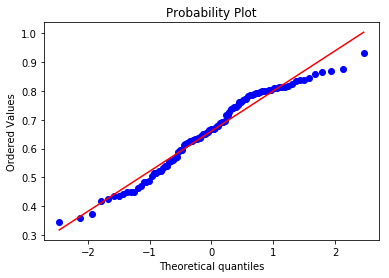

In [13]:
probplot(dados.energy, dist='norm', plot=plt);

Segunda variavel a ser analisada: danceability

In [10]:
quant2 = ['speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy']

In [11]:
quant2_x = quant2.copy()

In [12]:
re = regre(dados.loc[:, quant2], dados.danceability)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     4.791
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           3.18e-05
Time:                        08:37:26   Log-Likelihood:                 86.059
No. Observations:                 100   AIC:                            -152.1
Df Residuals:                      90   BIC:                            -126.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8946      0.133      6.720      0.000       0.630       1.159
speechiness          0.2621      0.133      1.964      0.053      -0.003       0.527
instrumentalness     0.3958      0.438      0.903      0.369      -0.475       1.266
liveness            -0.0107      0.140     -0.076      0.939      -0.290       0.268
valence              0.2428      0.058      4.152      0.000       0.127       0.359
tempo               -0.0013      0.000     -3.132      0.002      -0.002      -0.000
loudness             0.0054      0.010      0.524      0.602      -0.015       0.026
key                 -0.0016      0.003     -0.542      0.589      -0.007       0.004
acousticness        -0.0885      0.071     -1.240      0.218      -0.230       0.053
energy              -0.2076      0.121     -1.722      0.089      -0.447       0.032
==============================================================================
Omnibus:                        6.179   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.958
Skew:                          -0.341   Prob(JB):                       0.0308
Kurtosis:                       4.097   Cond. No.                     5.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

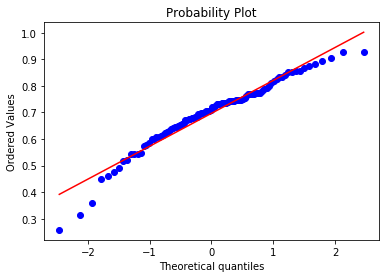

In [14]:
probplot(dados.danceability, dist='norm', plot=plt);

Terceira variavel a ser analisada: speechiness

In [15]:
quant3 = [ 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability']

In [16]:
quant3_x = quant3.copy()

In [18]:
re = regre(dados.loc[:, quant3], dados.speechiness)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            speechiness   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     4.300
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           0.000114
Time:                        08:40:10   Log-Likelihood:                 111.76
No. Observations:                 100   AIC:                            -203.5
Df Residuals:                      90   BIC:                            -177.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3612      0.120     -3.003      0.003      -0.600      -0.122
instrumentalness    -0.6052      0.334     -1.810      0.074      -1.269       0.059
liveness            -0.0413      0.108     -0.380      0.704      -0.257       0.174
valence              0.0145      0.049      0.294      0.769      -0.084       0.113
tempo                0.0006      0.000      1.656      0.101      -0.000       0.001
loudness            -0.0333      0.007     -4.678      0.000      -0.047      -0.019
key                  0.0008      0.002      0.338      0.736      -0.004       0.005
acousticness        -0.0495      0.055     -0.893      0.374      -0.160       0.061
energy               0.1600      0.093      1.716      0.090      -0.025       0.345
danceability         0.1567      0.080      1.964      0.053      -0.002       0.315
==============================================================================
Omnibus:                       12.748   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.616
Skew:                           0.794   Prob(JB):                      0.00110
Kurtosis:                       3.864   Cond. No.                     4.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

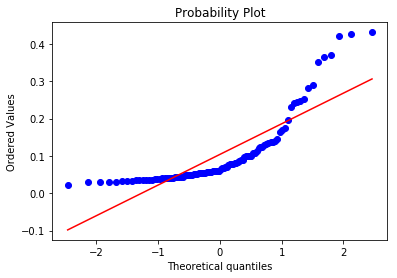

In [19]:
probplot(dados.speechiness, dist='norm', plot=plt);

Quarta variavel a ser analisada: instrumentalness

In [20]:
quant4 = [ 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness']

In [21]:
quant4_x = quant4.copy()

In [22]:
re = regre(dados.loc[:, quant4], dados.instrumentalness)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       instrumentalness   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.175
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.321
Time:                        08:43:08   Log-Likelihood:                 228.98
No. Observations:                 100   AIC:                            -438.0
Df Residuals:                      90   BIC:                            -411.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0821      0.038     -2.155      0.034      -0.158      -0.006
liveness        -0.0266      0.033     -0.795      0.429      -0.093       0.040
valence         -0.0059      0.015     -0.384      0.702      -0.036       0.024
tempo            0.0001      0.000      1.282      0.203   -7.54e-05       0.000
loudness        -0.0052      0.002     -2.185      0.032      -0.010      -0.000
key             -0.0005      0.001     -0.775      0.440      -0.002       0.001
acousticness    -0.0042      0.017     -0.243      0.808      -0.038       0.030
energy           0.0636      0.029      2.225      0.029       0.007       0.120
danceability     0.0227      0.025      0.903      0.369      -0.027       0.073
speechiness     -0.0580      0.032     -1.810      0.074      -0.122       0.006
==============================================================================
Omnibus:                      152.231   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6161.021
Skew:                           5.623   Prob(JB):                         0.00
Kurtosis:                      39.772   Cond. No.                     2.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

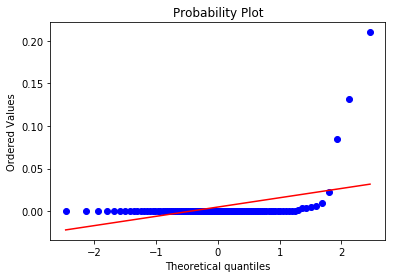

In [23]:
probplot(dados.instrumentalness, dist='norm', plot=plt);

Quinta variavel a ser analisada: liveness

In [24]:
quant5 = [ 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'instrumentalness']

In [25]:
quant5_x = quant5.copy()

In [26]:
re = regre(dados.loc[:, quant5], dados.liveness)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               liveness   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.4623
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.896
Time:                        08:54:42   Log-Likelihood:                 114.69
No. Observations:                 100   AIC:                            -209.4
Df Residuals:                      90   BIC:                            -183.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0549      0.122      0.448      0.655      -0.188       0.298
valence             -0.0024      0.048     -0.049      0.961      -0.098       0.093
tempo             3.755e-05      0.000      0.111      0.912      -0.001       0.001
loudness            -0.0058      0.008     -0.755      0.452      -0.021       0.009
key                 -0.0007      0.002     -0.300      0.765      -0.005       0.004
acousticness        -0.0497      0.054     -0.924      0.358      -0.157       0.057
energy               0.1229      0.091      1.349      0.181      -0.058       0.304
danceability        -0.0060      0.079     -0.076      0.939      -0.163       0.151
speechiness         -0.0389      0.102     -0.380      0.704      -0.242       0.164
instrumentalness    -0.2619      0.329     -0.795      0.429      -0.916       0.392
==============================================================================
Omnibus:                       23.797   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.667
Skew:                           1.204   Prob(JB):                     1.33e-07
Kurtosis:                       4.343   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

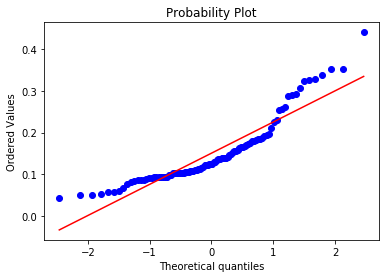

In [27]:
probplot(dados.liveness, dist='norm', plot=plt);

Sexta variavel a ser analisada: valence

In [28]:
quant6 = [ 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness']

In [29]:
quant6_x = quant6.copy()

In [30]:
re = regre(dados.loc[:, quant6], dados.valence)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     7.060
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           3.21e-07
Time:                        08:57:37   Log-Likelihood:                 35.796
No. Observations:                 100   AIC:                            -53.59
Df Residuals:                      91   BIC:                            -30.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0606      0.261      0.232      0.817      -0.459       0.580
tempo           -0.0006      0.001     -0.858      0.393      -0.002       0.001
loudness         0.0331      0.016      2.063      0.042       0.001       0.065
key            6.09e-05      0.005      0.013      0.990      -0.010       0.010
acousticness     0.2442      0.116      2.114      0.037       0.015       0.474
energy           0.3202      0.193      1.657      0.101      -0.064       0.704
danceability     0.6570      0.158      4.154      0.000       0.343       0.971
speechiness      0.0825      0.220      0.375      0.709      -0.354       0.519
liveness        -0.0040      0.230     -0.017      0.986      -0.461       0.453
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.227
Skew:                           0.106   Prob(JB):                        0.893
Kurtosis:                       3.099   Cond. No.                     2.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

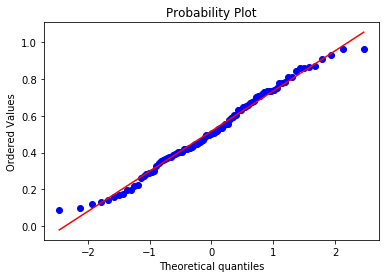

In [32]:
probplot(dados.valence, dist='norm', plot=plt);

Setima variavel a ser analisada: tempo 

In [33]:
quant7 = [ 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence']

In [34]:
quant7_x = quant7.copy()

In [35]:
re = regre(dados.loc[:, quant7], dados.tempo)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.715
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           0.000848
Time:                        09:00:46   Log-Likelihood:                -460.31
No. Observations:                 100   AIC:                             938.6
Df Residuals:                      91   BIC:                             962.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          151.1895     33.801      4.473      0.000      84.047     218.332
loudness        -2.0110      2.334     -0.862      0.391      -6.647       2.625
key             -0.2859      0.691     -0.414      0.680      -1.658       1.086
acousticness   -34.7836     16.495     -2.109      0.038     -67.550      -2.018
energy          23.9445     27.881      0.859      0.393     -31.438      79.327
danceability   -71.6295     23.452     -3.054      0.003    -118.215     -25.045
speechiness     45.2254     31.059      1.456      0.149     -16.470     106.921
liveness         0.1601     32.820      0.005      0.996     -65.033      65.353
valence        -12.7842     14.904     -0.858      0.393     -42.389      16.820
==============================================================================
Omnibus:                        2.600   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.257
Skew:                           0.367   Prob(JB):                        0.324
Kurtosis:                       3.049   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

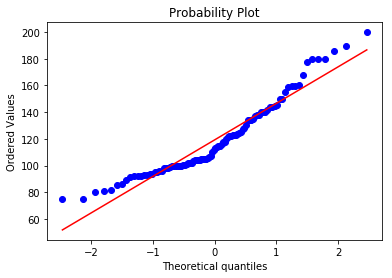

In [36]:
probplot(dados.tempo, dist='norm', plot=plt);

Oitava variavel a ser analisada: loudness

In [37]:
quant8 = [ 'key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo']

In [38]:
quant8_x = quant8.copy()

In [39]:
re = regre(dados.loc[:, quant8], dados.loudness)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loudness   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     19.97
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           4.46e-17
Time:                        09:02:57   Log-Likelihood:                -149.60
No. Observations:                 100   AIC:                             317.2
Df Residuals:                      91   BIC:                             340.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.2096      1.282     -7.965      0.000     -12.756      -7.663
key             -0.0268      0.031     -0.869      0.387      -0.088       0.034
acousticness    -0.6848      0.752     -0.910      0.365      -2.179       0.809
energy           7.6598      0.961      7.972      0.000       5.751       9.568
danceability     0.3664      1.101      0.333      0.740      -1.820       2.553
speechiness     -5.6053      1.277     -4.391      0.000      -8.141      -3.069
liveness        -0.8734      1.465     -0.596      0.553      -3.784       2.037
valence          1.3496      0.654      2.063      0.042       0.050       2.649
tempo           -0.0040      0.005     -0.862      0.391      -0.013       0.005
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.264
Skew:                          -0.599   Prob(JB):                     0.000799
Kurtosis:                       4.410   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

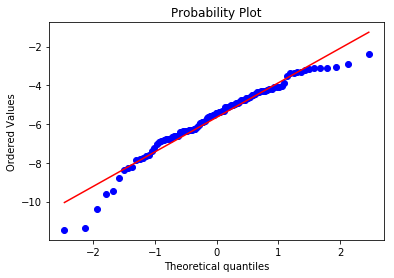

In [40]:
probplot(dados.loudness, dist='norm', plot=plt);

Nona variavel a ser analisada: key

In [41]:
quant9 = [ 'acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness']

In [42]:
quant9_x = quant9.copy()

In [43]:
re = regre(dados.loc[:, quant9], dados.key)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    key   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.3160
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.958
Time:                        09:04:45   Log-Likelihood:                -271.70
No. Observations:                 100   AIC:                             561.4
Df Residuals:                      91   BIC:                             584.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9045      5.654      0.514      0.609      -8.326      14.135
acousticness     0.7596      2.561      0.297      0.767      -4.327       5.847
energy           4.7252      4.217      1.121      0.265      -3.651      13.101
danceability    -2.3245      3.727     -0.624      0.534      -9.727       5.078
speechiness      2.3643      4.759      0.497      0.621      -7.088      11.817
liveness        -1.1847      4.976     -0.238      0.812     -11.069       8.700
valence          0.0285      2.269      0.013      0.990      -4.480       4.537
tempo           -0.0066      0.016     -0.414      0.680      -0.038       0.025
loudness        -0.3076      0.354     -0.869      0.387      -1.011       0.396
==============================================================================
Omnibus:                       39.211   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.628
Skew:                          -0.138   Prob(JB):                       0.0364
Kurtosis:                       1.769   Cond. No.                     2.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

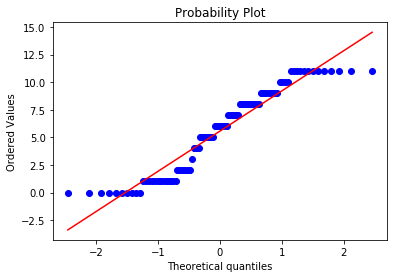

In [44]:
probplot(dados.key, dist='norm', plot=plt);

Decima variavel a ser analisada: acousticness

In [45]:
quant = [ 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness', 'key']

In [46]:
quant_x = quant.copy()

In [47]:
re = regre(dados.loc[:, quant], dados.acousticness)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.568
Date:                Thu, 22 Nov 2018   Prob (F-statistic):             0.0142
Time:                        09:07:07   Log-Likelihood:                 47.925
No. Observations:                 100   AIC:                            -77.85
Df Residuals:                      91   BIC:                            -54.40
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5164      0.225      2.293      0.024       0.069       0.964
energy          -0.2891      0.171     -1.690      0.094      -0.629       0.051
danceability    -0.1934      0.151     -1.277      0.205      -0.494       0.107
speechiness     -0.1685      0.194     -0.868      0.388      -0.554       0.217
liveness        -0.1848      0.203     -0.912      0.364      -0.588       0.218
valence          0.1916      0.091      2.114      0.037       0.012       0.372
tempo           -0.0013      0.001     -2.109      0.038      -0.003   -7.77e-05
loudness        -0.0132      0.014     -0.910      0.365      -0.042       0.016
key              0.0013      0.004      0.297      0.767      -0.007       0.010
==============================================================================
Omnibus:                        8.394   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.461
Skew:                           0.709   Prob(JB):                       0.0145
Kurtosis:                       3.141   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

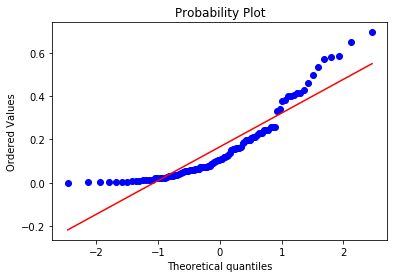

In [48]:
probplot(dados.acousticness, dist='norm', plot=plt);